# Install packages to plot 2020 Airbnb host revenue

In [5]:
pip install geopandas

In [6]:
pip install mplleaflet

  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-cp36-none-any.whl size=28555 sha256=093e049d9ba678d37990f6ab5b50546224106b65d964922298ab1298317b0785
  Stored in directory: /root/.cache/pip/wheels/bf/fd/0b/0513de62c339c4a56e2234aa42a5d06e6660a4446fdae7b796
Successfully built mplleaflet


In [10]:
!apt-get install libproj-dev proj-bin proj-data
!apt-get install libgeos-dev

# shapely needs to be reinstalled to use the same geos install as cartopy (https://github.com/SciTools/cartopy/issues/871)
!pip uninstall -y shapely
!pip install --no-binary shapely shapely
!pip install cartopy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  libproj-dev proj-bin
0 upgraded, 2 newly installed, 0 to remove and 14 not upgraded.
Need to get 232 kB of archives.
After this operation, 1,220 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 232 kB in 1s (343 kB/s)
Selecting previously unselected package libproj-dev:amd64.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...
Unpacking libproj-dev:amd64 (4.9.3-2) ...
Selecting previously unselected package proj-bin.
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.

In [11]:
!pip install geoplot

  Using cached https://files.pythonhosted.org/packages/e1/8f/46133752e1f02e70501939e739b81cbc85c79d7398c963b8a25a3178bffe/geoplot-0.4.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a4/24/fa7512ea4c4a07eb05f845023275edcbb73f08f9150662acbfd31bf5e047/mapclassify-2.4.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/93/2a/22b34b6129303c594c21cb80ded800ebd6d13037f00d162d9b3a3785d5ea/contextily-1.0.1-py3-none-any.whl
     |████████████████████████████████| 18.3MB 264kB/s 


# Read in 2020 Boston Airbnb data and convert sample data to geopandas data for plotting

In [66]:
import pandas as pd
df = pd.read_csv('./listings.csv.gz')
df_sample = df.sample(n=668, random_state=36)

boston_2020_geodf = gpd.GeoDataFrame(    df_sample[['price','availability_365']], geometry=gpd.points_from_xy(df_sample.longitude, df_sample.latitude) )

(668, 74)


In [67]:
boston_2020_geodf.head(3)

,price,availability_365,geometry
2737,$153.00,113,POINT (-71.06482 42.35300)
2149,$27.00,0,POINT (-71.08010 42.31968)
756,$70.00,0,POINT (-71.10005 42.31689)


# Revenue calculation equation
##    Revenue = price * (365 - available_date)

In [68]:
import re
def str2float(x):
    return float(re.sub("[\$,]","", x))
boston_2020_geodf['revenue'] = boston_2020_geodf.price.apply(str2float)*(365-boston_2020_geodf.availability_365)
boston_2020_geodf.head(3)

,price,availability_365,geometry,revenue
2737,$153.00,113,POINT (-71.06482 42.35300),38556.0
2149,$27.00,0,POINT (-71.08010 42.31968),9855.0
756,$70.00,0,POINT (-71.10005 42.31689),25550.0


# Plot 2020 Boston sample host revenue on map. It would be interesting to find out how to improve occupancy rate as price is largely determined by property and not easily to increase.

# Hot color illustrate high revenue Airbnb host. The colder the color the fewer the revenue

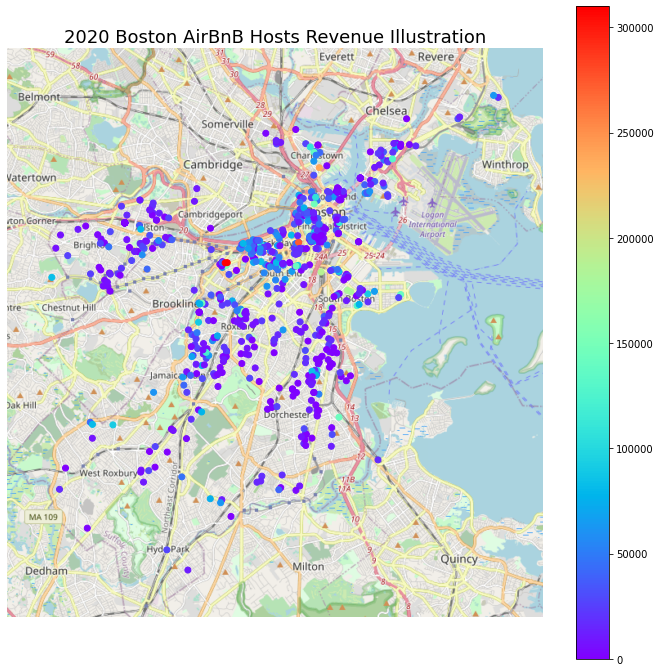

In [91]:
ax = gplt.pointplot(boston_2020_geodf, s=6, hue=boston_2020_geodf.revenue, projection=gcrs.WebMercator(), 
                    figsize=(12, 12), legend=True, legend_var='hue', cmap='rainbow')
gplt.webmap(boston_2020_geodf, ax=ax)
plt.title('2020 Boston AirBnB Hosts Revenue Illustration', fontsize=18);